In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
df= pd.read_csv("/content/drive/MyDrive/Data Science Internship/Iris Dataset/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


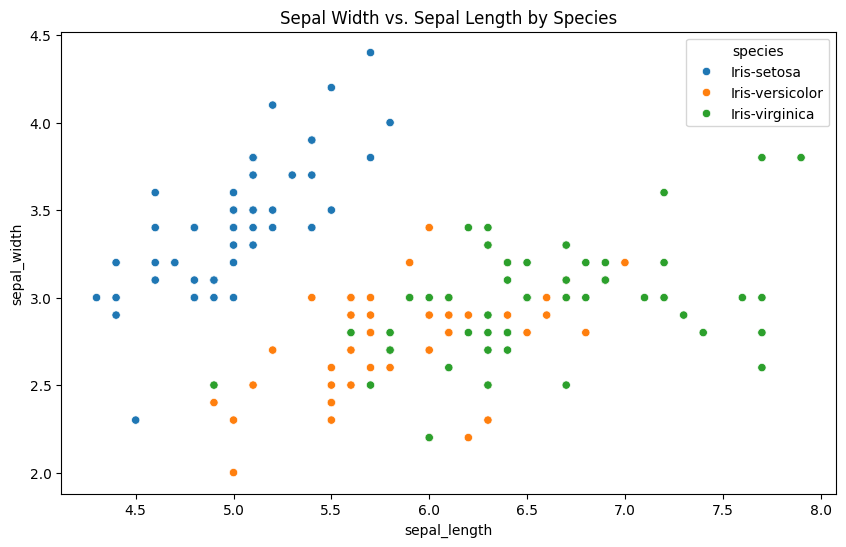

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Width vs. Sepal Length by Species')
plt.show()

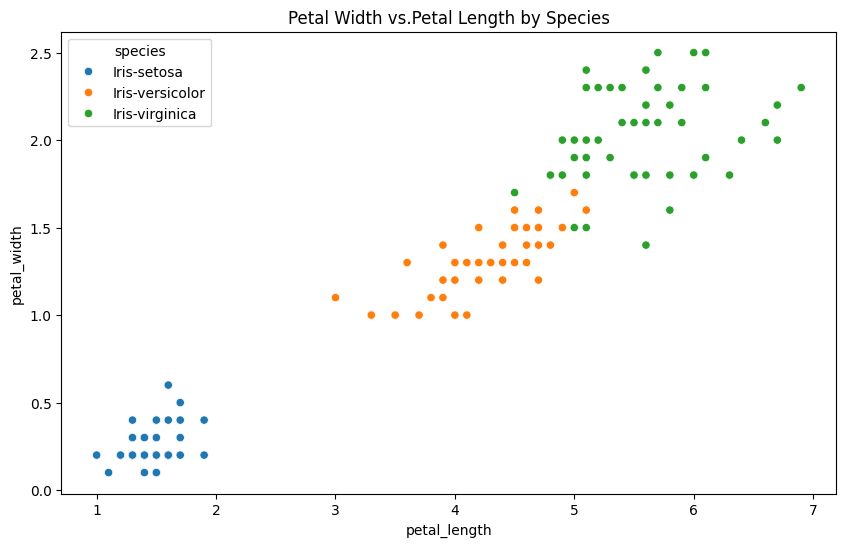

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Petal Width vs.Petal Length by Species')
plt.show()

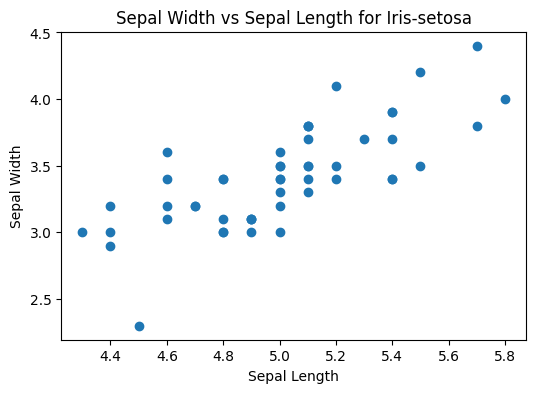

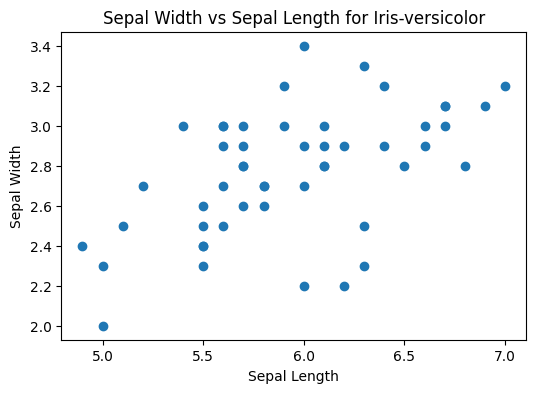

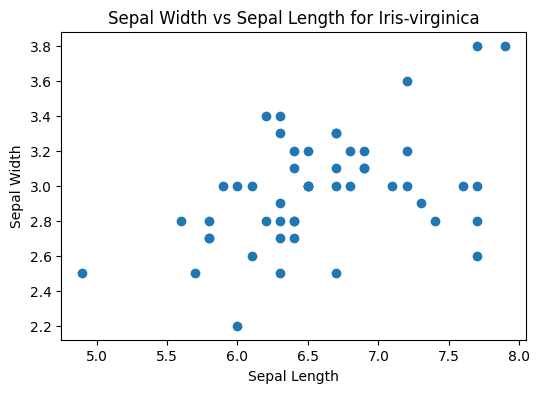

In [10]:
species_names = df['species'].unique()

for species in species_names:
    subset = df[df['species'] == species]
    plt.figure(figsize=(6, 4))
    plt.scatter(subset['sepal_length'], subset['sepal_width'])
    plt.title(f'Sepal Width vs Sepal Length for {species}')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

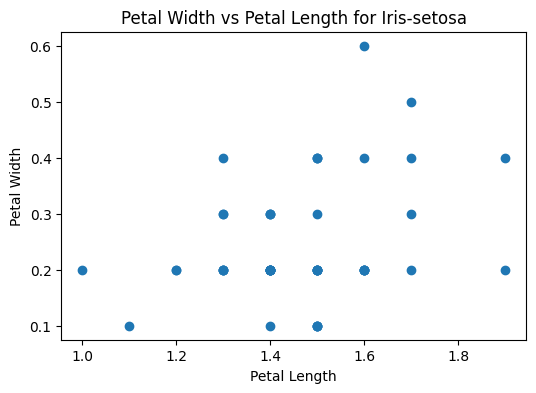

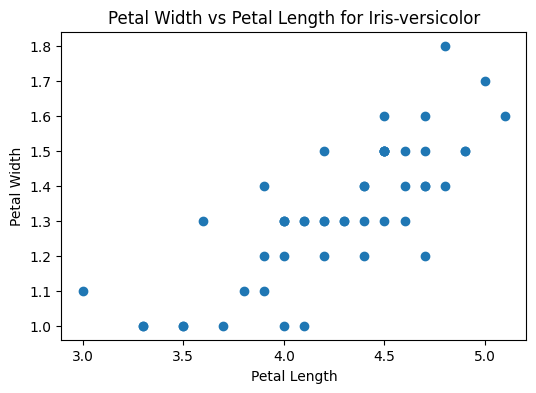

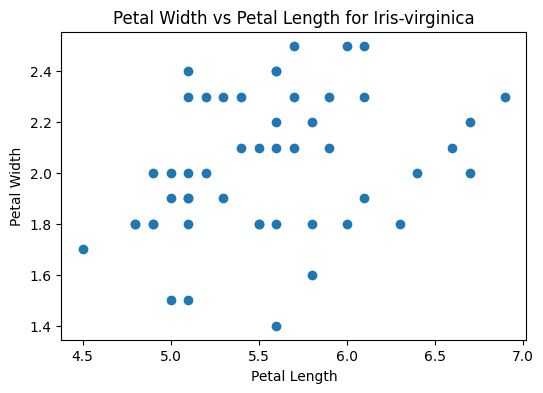

In [11]:
species_names = df['species'].unique()

for species in species_names:
    subset = df[df['species'] == species]
    plt.figure(figsize=(6, 4))
    plt.scatter(subset['petal_length'], subset['petal_width'])
    plt.title(f'Petal Width vs Petal Length for {species}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
cols_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [15]:
for col in df:
    print(f'{col}: {df[col].unique()}')

sepal_length: [0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
 0.02777778 0.13888889 0.         0.41666667 0.38888889 0.25
 0.33333333 0.05555556 0.27777778 0.75       0.58333333 0.72222222
 0.61111111 0.55555556 0.63888889 0.44444444 0.47222222 0.5
 0.36111111 0.66666667 0.52777778 0.69444444 0.77777778 0.91666667
 0.83333333 0.80555556 0.94444444 0.86111111 1.        ]
sepal_width: [0.625      0.41666667 0.5        0.45833333 0.66666667 0.79166667
 0.58333333 0.375      0.70833333 0.83333333 1.         0.75
 0.54166667 0.875      0.91666667 0.125      0.33333333 0.16666667
 0.29166667 0.         0.08333333 0.20833333 0.25      ]
petal_length: [0.06779661 0.05084746 0.08474576 0.11864407 0.10169492 0.01694915
 0.03389831 0.         0.15254237 0.62711864 0.59322034 0.66101695
 0.50847458 0.61016949 0.38983051 0.49152542 0.42372881 0.54237288
 0.44067797 0.57627119 0.52542373 0.6440678  0.55932203 0.6779661
 0.47457627 0.45762712 0.69491525 0.33898305 0.84745763 0.830

In [16]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,int64


In [17]:

X = df.drop(['species'], axis='columns')

y = df[['species']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [18]:
len(X_train)

120

In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
39,0.222222,0.583333,0.084746,0.041667
53,0.333333,0.125000,0.508475,0.500000
79,0.388889,0.250000,0.423729,0.375000
10,0.305556,0.708333,0.084746,0.041667
50,0.750000,0.500000,0.627119,0.541667


In [20]:
y_train.head()

,species
39,0
53,1
79,1
10,0
50,1


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_classifier = SVC(kernel='linear', random_state=5)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(y_pred)


[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (SVM):", accuracy)

Accuracy (SVM): 0.9


In [23]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5)

In [24]:
svm.score(X_test, y_test)

0.9

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [26]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 3s - 824ms/step - accuracy: 0.3667 - loss: 1.0991
Epoch 2/100
4/4 - 0s - 11ms/step - accuracy: 0.3250 - loss: 1.0928
Epoch 3/100
4/4 - 0s - 13ms/step - accuracy: 0.4333 - loss: 1.0608
Epoch 4/100
4/4 - 0s - 15ms/step - accuracy: 0.4583 - loss: 1.0439
Epoch 5/100
4/4 - 0s - 16ms/step - accuracy: 0.4583 - loss: 1.0445
Epoch 6/100
4/4 - 0s - 12ms/step - accuracy: 0.5000 - loss: 1.0395
Epoch 7/100
4/4 - 0s - 14ms/step - accuracy: 0.6083 - loss: 0.9967
Epoch 8/100
4/4 - 0s - 11ms/step - accuracy: 0.6083 - loss: 0.9759
Epoch 9/100
4/4 - 0s - 14ms/step - accuracy: 0.6750 - loss: 0.9418
Epoch 10/100
4/4 - 0s - 16ms/step - accuracy: 0.6167 - loss: 0.9560
Epoch 11/100
4/4 - 0s - 11ms/step - accuracy: 0.7500 - loss: 0.8976
Epoch 12/100
4/4 - 0s - 15ms/step - accuracy: 0.6417 - loss: 0.9036
Epoch 13/100
4/4 - 0s - 14ms/step - accuracy: 0.6333 - loss: 0.8828
Epoch 14/100
4/4 - 0s - 15ms/step - accuracy: 0.7167 - loss: 0.8504
Epoch 15/100
4/4 - 0s - 16ms/step - accuracy: 0.7500 - l

In [30]:
prediction = model.predict(X_test)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[2.63420101e-02 8.84265602e-01 8.93923789e-02]
 [3.52028292e-03 5.76048493e-01 4.20431256e-01]
 [2.25615076e-04 8.01432207e-02 9.19631183e-01]
 [9.96063530e-01 3.88220930e-03 5.41603986e-05]
 [9.55772048e-05 6.93209320e-02 9.30583537e-01]
 [6.80934191e-02 8.78579259e-01 5.33273518e-02]
 [9.92674172e-01 7.22244661e-03 1.03336024e-04]
 [6.20424002e-03 5.68495929e-01 4.25299764e-01]
 [9.91258621e-01 8.62577464e-03 1.15584342e-04]
 [1.73295029e-02 8.08652103e-01 1.74018294e-01]
 [1.55070825e-02 8.00112069e-01 1.84380844e-01]
 [4.80800867e-03 6.21089816e-01 3.74102116e-01]
 [1.67634789e-04 9.80749577e-02 9.01757300e-01]
 [3.13681609e-04 1.88976154e-01 8.10710192e-01]
 [9.94681180e-01 5.24459174e-03 7.41700933e-05]
 [9.87110138e-01 1.26702609e-02 2.19530644e-04]
 [1.25578628e-03 2.50781476e-01 7.47962654e-01]
 [1.75743728e-04 1.22532740e-01 8.77291501e-01]
 [9.97663796e-01 2.30794935e-03 2.81850880e-05]
 [9.94395196e-01 5.53131849e-03 7.33534253e-05]
 [

In [31]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[1 1 2 0 2]


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9


In [33]:
con_mat = confusion_matrix(y_test, prediction)
print(con_mat)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


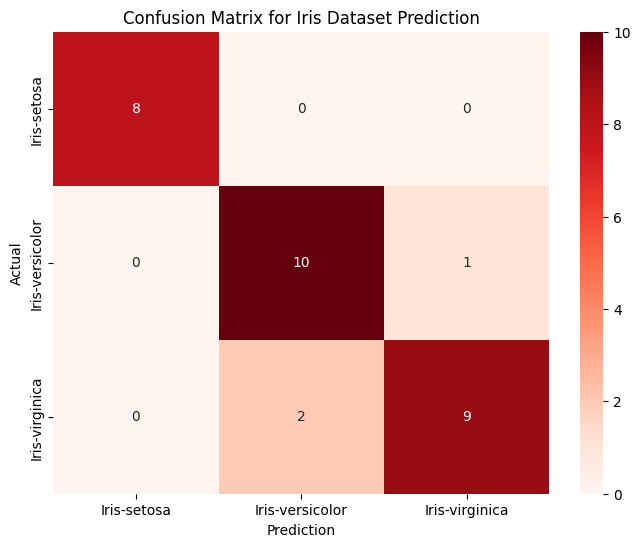

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)

plt.title('Confusion Matrix for Iris Dataset Prediction')
plt.xlabel('Prediction')
plt.ylabel('Actual');